In [1]:
import pandas as pd
data = pd.read_csv('Global YouTube Statistics.csv', encoding = 'latin-1')
#print(data.head())
print(data.info())
print()
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [2]:
'''
data['category'] = data.fillna(data['channel_type'])
data.fillna(data['channel_type']) fills all missing values
in the entire DataFrame using the corresponding values from
the channel_type column.
'''
data['category'].fillna(data['channel_type'], inplace = True)
data['channel_type'].fillna(data['category'], inplace = True)
data.dropna(subset=['category','channel_type'], inplace = True)

print(data.isnull().sum())

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                     0
Title                                        0
uploads                                      0
Country                                    119
Abbreviation                               119
channel_type                                 0
video_views_rank                             1
country_rank                               113
channel_type_rank                           30
video_views_for_the_last_30_days            53
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               334
created_year                                 5
created_month                                5
created_date 

<ipython-input-2-8194a380653f>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['category'].fillna(data['channel_type'], inplace = True)
<ipython-input-2-8194a380653f>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [3]:
# channel specific analysis
# Q1. what are the top 10 youtubers by subscriber count
top10_sc = data.nlargest(10, 'subscribers')[['subscribers', 'Youtuber', 'category','channel_type']]
print(top10_sc)

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
plotly_templates = 'plotly_white'
'''
fig = go.Figure()
fig.add_trace(go.Bar(x = top10_sc,
                     y = data[['subscribers', 'Youtuber', 'category','channel_type']],
                     name = ' Top 10 youtubers by subcribers count'))
fig.update_layout(title = 'Top 10 youtubers by subs count',
                  xaxis_title = 'Subcriber count')
                  #yaxis_title = 'subscribers', 'Youtuber', 'category','channel_type')
fig.show()
'''

fig = go.Figure()

fig.add_trace(go.Bar(
    x=top10_sc['subscribers'],  # Subscribers as x-axis
    y=top10_sc['Youtuber'],     # YouTubers as y-axis
    orientation='h',            # Horizontal bar chart
    name='Top 10 YouTubers by Subscriber Count',
    text=top10_sc['channel_type'] # Display category as text
))

# Updating layout
fig.update_layout(
    title='Top 10 YouTubers by Subscriber Count',
    xaxis_title='Subscriber Count',
    yaxis_title='YouTubers',
)

fig.show()

'''
1. to find the n largest in a dataset you can use groupby or better yet,
nlargest(N,coln). This will get the entire rows of the N largest things.
Note: if you want only specific items then, after nlagest() put [['','','',]]
to get them


2. while working with graph_objects x and y items must be a coln in the dataframe.
You cannot send multiple items in just one x or y.
So, we can work our way in a such a way as to put counts and ytnames on x and y axes
rsply and then use text option to display the other coln we wanted to as a text on the graph
'''


   subscribers                    Youtuber          category   channel_type
0    245000000                    T-Series             Music          Music
1    170000000              YouTube Movies  Film & Animation          Games
2    166000000                     MrBeast     Entertainment  Entertainment
3    162000000  Cocomelon - Nursery Rhymes         Education      Education
4    159000000                   SET India             Shows  Entertainment
5    119000000                       Music             Music          Music
6    112000000         ýýý Kids Diana Show    People & Blogs  Entertainment
7    111000000                   PewDiePie            Gaming  Entertainment
8    106000000                 Like Nastya    People & Blogs         People
9     98900000               Vlad and Niki     Entertainment  Entertainment


"\n1. to find the n largest in a dataset you can use groupby or better yet,\nnlargest(N,coln). This will get the entire rows of the N largest things. \nNote: if you want only specific items then, after nlagest() put [['','','',]]\nto get them \n\n\n2. while working with graph_objects x and y items must be a coln in the dataframe.\nYou cannot send multiple items in just one x or y. \nSo, we can work our way in a such a way as to put counts and ytnames on x and y axes \nrsply and then use text option to display the other coln we wanted to as a text on the graph \n"

In [4]:
# Q2. which categories have the highest avergae subsriber count

havg_sc = data.groupby('category')['subscribers'].mean()
#havg_sc2 = data.groupby('category').agg({'subscribers':'mean',
                                        #'Youtuber':list})
print(havg_sc)
print()
print(havg_sc.count())
print()
print(havg_sc.idxmax(),havg_sc.max())
#print(havg_sc2)
#print(havg_sc.columns) error cause its not a df
'''
fig = go.Figure()
fig.add_trace(go.Scatter(x = havg_sc,y = havg_sc['category'],name = 'highest avg '))
fig.show()
'''

fig = go.Figure()
fig.add_trace(go.Scatter(x=havg_sc.index, y=havg_sc.values, name='highest avg'))
fig.update_layout(
    title='Highest average categories by subscriber count',
    xaxis_title='Catergory',
    yaxis_title='Subsciber count',
)

fig.show()

'''
1. use groupby when you need it in a certain order
2. agg() takes it in a dict format
3. idxmax() is used return the index ( in this case the category ) of the max value
'''

category
Autos & Vehicles         1.785000e+07
Comedy                   2.012319e+07
Education                2.599184e+07
Entertainment            2.162383e+07
Film                     1.250000e+07
Film & Animation         2.858478e+07
Games                    3.088333e+07
Gaming                   2.085213e+07
Howto                    1.930000e+07
Howto & Style            1.939000e+07
Movies                   2.565000e+07
Music                    2.612010e+07
News & Politics          2.063077e+07
Nonprofits & Activism    2.775000e+07
People                   1.623333e+07
People & Blogs           2.105606e+07
Pets & Animals           1.810000e+07
Science & Technology     1.861765e+07
Shows                    4.161538e+07
Sports                   2.619167e+07
Tech                     1.450000e+07
Trailers                 3.900000e+07
Travel & Events          1.250000e+07
Name: subscribers, dtype: float64

23

Shows 41615384.615384616


'\n1. use groupby when you need it in a certain order \n2. agg() takes it in a dict format \n3. idxmax() is used return the index ( in this case the category ) of the max value\n'

In [5]:
'''
HAS MISSING ITEMS
HAVE TO LOOK INTO CATERGORICAL MISSING VALUES
'''


# Q3. what is the distribution of youtube channels across different countries
dist_country = data.groupby('Country')['Youtuber'].count()
print(dist_country)
print()
print(dist_country.count())
print()
print(dist_country.idxmax(),dist_country.max())

fig = go.Figure()
fig.add_trace(go.Scatter(x=dist_country.index, y=dist_country.values, name='country wise dist'))
fig.update_layout(
    title='dist of yt channels across different countries',
    xaxis_title='Country',
    yaxis_title='Youtuber Count',
)

fig.show()


'''
# Distribution of YouTube channels across countries
dist_country = data.groupby('Country')['Youtuber'].count().sort_values(ascending=False)

# Print statistics
print("Distribution of YouTube channels across countries:")
print(dist_country)
print()
print(f"Total countries: {dist_country.count()}")
print()
print(f"Top country: {dist_country.idxmax()} with {dist_country.max()} YouTube channels")

# Visualization
fig = px.bar(
    dist_country.reset_index(), # making it a dataframe with colns country and youtuber
    x='Country',
    y='Youtuber',
    title='Distribution of YouTube Channels Across Countries',
    labels={'Youtuber': 'YouTuber Count'},
    template='plotly_white'
)
fig.update_layout(
    xaxis=dict(title='Country', tickangle=-45),
    yaxis_title='Number of YouTube Channels'
)
fig.show()
'''
'''
px.bar is used, which is more suitable for categorical distributions.
'''

Country
Afghanistan               1
Andorra                   1
Argentina                13
Australia                 9
Bangladesh                1
Barbados                  1
Brazil                   62
Canada                   15
Chile                     3
China                     1
Colombia                 11
Cuba                      1
Ecuador                   2
Egypt                     2
El Salvador               1
Finland                   1
France                    5
Germany                   6
India                   168
Indonesia                28
Iraq                      2
Italy                     2
Japan                     5
Jordan                    3
Kuwait                    1
Latvia                    1
Malaysia                  1
Mexico                   33
Morocco                   1
Netherlands               3
Pakistan                  6
Peru                      1
Philippines              12
Russia                   16
Samoa                     1
Saudi Arabia

'\npx.bar is used, which is more suitable for categorical distributions.\n'

In [6]:
'''
HAS MISSING ITEMS
HAVE TO LOOK INTO CATERGORICAL MISSING VALUES
'''
#choose the distribution of catergories of channels in the top 10 countries fromthe above

top_10_countries = dist_country.nlargest(10).index
data_top_countries = data[data['Country'].isin(top_10_countries)]
category_dist = data_top_countries.groupby(['Country', 'category']).size().reset_index(name='Count')
category_dist = category_dist.sort_values(by='Count', ascending=False)
print()
print(category_dist)
fig = px.bar(
    category_dist,
    x='Country',
    y='Count',
    color='category',
    title='Distribution of Categories in the Top 10 Countries',
    labels={'Count': 'Number of Channels', 'category': 'Channel Category'},
    template='plotly_white'
)
#fig.update_layout(barmode='stack')  # For stacked bars
fig.show()



           Country          category  Count
81   United States     Entertainment     83
87   United States             Music     74
12           India     Entertainment     45
91   United States    People & Blogs     38
19           India             Music     29
..             ...               ...    ...
42          Mexico   Travel & Events      1
69  United Kingdom             Games      1
29       Indonesia             Music      1
71  United Kingdom     Howto & Style      1
0           Brazil  Autos & Vehicles      1

[96 rows x 3 columns]


**PERFORMANCE METRICS**

In [7]:
#Q4. which youtuber has the highest video views
print(data.info())
hvv_yter = data.loc[data['video views'].idxmax()]
print()
print(data.isnull().sum())
print(hvv_yter)

<class 'pandas.core.frame.DataFrame'>
Index: 992 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     992 non-null    int64  
 1   Youtuber                                 992 non-null    object 
 2   subscribers                              992 non-null    int64  
 3   video views                              992 non-null    float64
 4   category                                 992 non-null    object 
 5   Title                                    992 non-null    object 
 6   uploads                                  992 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             992 non-null    object 
 10  video_views_rank                         991 non-null  

              uploads  subscribers  video views
uploads      1.000000     0.077210     0.165565
subscribers  0.077210     1.000000     0.751974
video views  0.165565     0.751974     1.000000


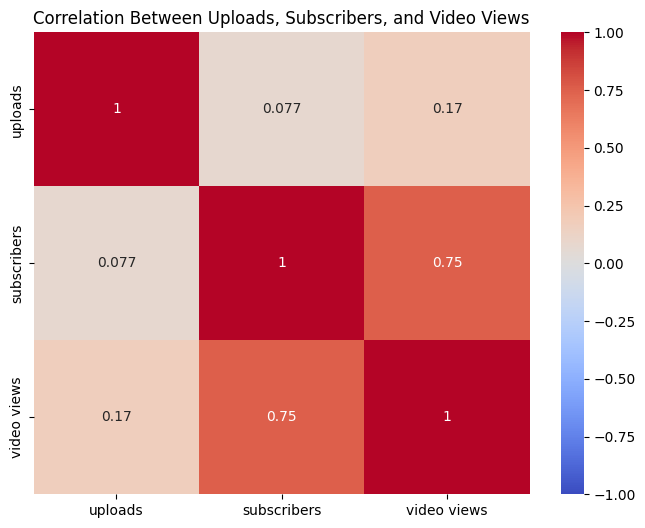

In [8]:
#Q5 how do the no of uploads correlate wiht the subs counts and video views
'''
Number of uploads: Represents how many videos a YouTuber has uploaded.
Subscriber counts: Indicates the size of the audience subscribing to the channel.
Video views: Measures the cumulative views across all uploaded videos

aim is to identify :
-> whether more uploads lead to higher susb or views
-> how susbs counts relate to video views
'''

correlation_matrix = data[['uploads', 'subscribers', 'video views']].corr()
print(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Uploads, Subscribers, and Video Views')
plt.show()


import plotly.express as px

# Uploads vs Subscribers
fig = px.scatter(data, x='uploads', y='subscribers',
                 title='Uploads vs Subscribers',
                 trendline='ols')
fig.show()

# Uploads vs Video Views
fig = px.scatter(data, x='uploads', y='video views',
                 title='Uploads vs Video Views',
                 trendline='ols')
fig.show()

# Subscribers vs Video Views
fig = px.scatter(data, x='subscribers', y='video views',
                 title='Subscribers vs Video Views',
                 trendline='ols')
fig.show()


In [9]:
#Q6 what is the trend of susbs growth for the top channels (if applicablr to the dataset)
top_channels = data.nlargest(10, 'subscribers')
print(top_channels[['Youtuber', 'subscribers']])
print()
data.dropna(subset=['created_year','created_month','created_date'], inplace = True)
#print(data.isnull().sum())
print()
top_channel_names = top_channels['Youtuber'].tolist()
top_channels_data = data[data['Youtuber'].isin(top_channel_names)]
#print(top_channels_data)

subs_trend = top_channels_data.groupby(['created_year','Youtuber'])['subscribers'].sum().reset_index()
print(subs_trend)


# Create a bar plot
fig = go.Figure()

for youtuber in top_channel_names:
    youtuber_data = top_channels_data[top_channels_data['Youtuber'] == youtuber]
    fig.add_trace(go.Bar(
        x=youtuber_data['subscribers'],   # Subscribers per year
        y=youtuber_data['created_year'], # Year
        orientation='h',                 # Horizontal bar chart
        name=youtuber,                   # Name of the YouTuber
        text=youtuber_data['Youtuber'], # Display subscriber count
    ))

# Update the layout for better visualization
fig.update_layout(
    title='Trend of Subscriber Growth for the Top Channels',
    xaxis_title='Subscriber Count',
    yaxis_title='Year',
    barmode='stack',  # Stack bars to show cumulative growth
    legend_title='YouTubers',
    template='plotly_white'
)

fig.show()

                     Youtuber  subscribers
0                    T-Series    245000000
1              YouTube Movies    170000000
2                     MrBeast    166000000
3  Cocomelon - Nursery Rhymes    162000000
4                   SET India    159000000
5                       Music    119000000
6         ýýý Kids Diana Show    112000000
7                   PewDiePie    111000000
8                 Like Nastya    106000000
9               Vlad and Niki     98900000


   created_year                    Youtuber  subscribers
0        2006.0  Cocomelon - Nursery Rhymes    162000000
1        2006.0                   SET India    159000000
2        2006.0                    T-Series    245000000
3        2006.0              YouTube Movies    170000000
4        2010.0                   PewDiePie    111000000
5        2012.0                     MrBeast    166000000
6        2013.0                       Music    119000000
7        2015.0         ýýý Kids Diana Show    112000000
8        201

**EARNINGS AND FINDINGS**

In [24]:
#Q7 what is the range of estimated monthly earnings for youtubers
#print(data.isnull().sum())
#print(data[['Youtuber','lowest_monthly_earnings']])
data['monthly_earnings_range'] = data['highest_monthly_earnings'] - data['lowest_monthly_earnings']
print(data['monthly_earnings_range'])
highest_range = data.loc[data['monthly_earnings_range'].idxmax()]
print(highest_range[['Youtuber', 'monthly_earnings_range']])
lowest_range = data.loc[data['monthly_earnings_range'].idxmin()]
print(lowest_range[['Youtuber', 'monthly_earnings_range']])



top_earners = data.nlargest(10, 'monthly_earnings_range')
fig = px.bar(top_earners, x='Youtuber', y='monthly_earnings_range',
             title='Top 10 YouTubers by Earnings Range', text='monthly_earnings_range')
fig.show()

'''
.min(): Gives the smallest value in the column.

Example: data['monthly_earnings_range'].min() will return the smallest range value (e.g., 0 or a small number).
.idxmin(): Gives the index of the row where the column has its minimum value.

Example: data['monthly_earnings_range'].idxmin() will return the index of the row with the smallest range.
.loc[]: Retrieves the row corresponding to the given index.
'''


0      8435400.00
1            0.05
2      5063000.00
3      7406200.00
4      6844100.00
          ...    
990    2061900.00
991     242700.00
992        251.00
993      14532.00
994      90000.00
Name: monthly_earnings_range, Length: 987, dtype: float64
Youtuber                  ýýýýýýýýý KIMPRO
monthly_earnings_range          12749100.0
Name: 495, dtype: object
Youtuber                  Music
monthly_earnings_range      0.0
Name: 5, dtype: object


"\n.min(): Gives the smallest value in the column.\n\nExample: data['monthly_earnings_range'].min() will return the smallest range value (e.g., 0 or a small number).\n.idxmin(): Gives the index of the row where the column has its minimum value.\n\nExample: data['monthly_earnings_range'].idxmin() will return the index of the row with the smallest range.\n.loc[]: Retrieves the row corresponding to the given index.\n"

In [32]:
#Q8 is there a corr b/w video views and earnings
corr_mat = data[['video views', 'monthly_earnings_range']].corr()
print(corr_mat)
fig = px.scatter(data, x='video views', y='monthly_earnings_range', color='category',
                 title='Monthly Earnings vs video views',
                 labels={'video views': 'video views', 'monthly_earnings_range': 'Monthly Earnings ($)'},
                 hover_data=['Youtuber'],
                 trendline = 'ols')
fig.show()


                        video views  monthly_earnings_range
video views                1.000000                0.550972
monthly_earnings_range     0.550972                1.000000
